In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#Read csv data into a Dataframe
data=pd.read_csv("C:/Users/Admin/Downloads/Shopee_retaiset_conf.csv")
df=pd.DataFrame(data)
df

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
0,0,Television,0.00,Electronics,0.19,62,0.00
1,1,Headphones,126.36,Electronics,0.07,3,379.08
2,1!,Headphones,207.21,Electronics,NaN,87,18027.27
3,0*,Television,1045.60,Electronics,0.03,49,51234.40
4,2,INVALID,520.46,Electronics,0.45,28,14572.88
...,...,...,...,...,...,...,...
995,4*,T-Shirt,23.15,Clothing,0.32,0,0.00
996,0,Television,1135.04,Electronics,0.02,81,91938.24
997,6,Laptop,1314.22,Electronics,0.25,28,36798.16
998,2,Phone,271.29,Electronics,0.14,17,4611.93


In [2]:
# Data Cleaning
# Keep only numeric characters in the ProductID column
df['ProductID'] = df['ProductID'].apply(lambda x: re.sub(r'\D', '', str(x)))

# Display the cleaned DataFrame
print(df)

    ProductID ProductName    Price     Category Discount  Quantity  TotalPrice
0           0  Television     0.00  Electronics     0.19        62        0.00
1           1  Headphones   126.36  Electronics     0.07         3      379.08
2           1  Headphones   207.21  Electronics      NaN        87    18027.27
3           0  Television  1045.60  Electronics     0.03        49    51234.40
4           2     INVALID   520.46  Electronics     0.45        28    14572.88
..        ...         ...      ...          ...      ...       ...         ...
995         4     T-Shirt    23.15     Clothing     0.32         0        0.00
996         0  Television  1135.04  Electronics     0.02        81    91938.24
997         6      Laptop  1314.22  Electronics     0.25        28    36798.16
998         2       Phone   271.29  Electronics     0.14        17     4611.93
999         1  Headphones   142.54  Electronics     0.24        11     1567.94

[1000 rows x 7 columns]


The 'ProductID' column in the DataFrame has been successfully cleansed, ensuring a standardized format for product identification. Non-numeric characters have been removed, leaving only numeric values. This meticulous cleaning process enhances data consistency and establishes a solid foundation for numerical analysis. The resulting DataFrame now reflects the cleaned 'ProductID' values, providing a reliable dataset for any further analytical or statistical operations.

In [4]:
df.groupby("ProductID")['ProductName'].unique()

ProductID
     [Laptop, Headphones, Television, nan, T-Shirt,...
0                           [Television, INVALID, nan]
1                           [Headphones, INVALID, nan]
2                                [INVALID, Phone, nan]
3                           [Toothpaste, INVALID, nan]
4                              [T-Shirt, nan, INVALID]
5                                 [Oven, INVALID, nan]
6                               [Laptop, nan, INVALID]
Name: ProductName, dtype: object

In [7]:
df.groupby('ProductName')['Category'].unique()

ProductName
Headphones                          [Electronics, nan, INVALID]
INVALID       [Electronics, INVALID, Groceries, HomeDecor, C...
Laptop                              [Electronics, nan, INVALID]
Oven                                  [HomeDecor, nan, INVALID]
Phone                               [Electronics, INVALID, nan]
T-Shirt                                [Clothing, INVALID, nan]
Television                          [Electronics, nan, INVALID]
Toothpaste                            [Groceries, nan, INVALID]
Name: Category, dtype: object

In [58]:
#Generate descriptive statistics for the DataFrame 
df.describe()

,Price,Quantity,TotalPrice
count,1000.000000,1000.000000,1000.000000
mean,437.048850,46.035000,20247.656680
std,495.793267,31.179929,31706.926448
min,0.000000,0.000000,0.000000
25%,16.432500,18.000000,245.010000
50%,262.005000,46.000000,5039.130000
75%,687.277500,73.000000,28326.300000
max,1999.780000,100.000000,180767.860000


The 'df.describe()' function has generated a comprehensive statistical summary of the numerical columns in the DataFrame. This summary offers valuable insights into the central tendency, dispersion, and distribution shape of the raw data. It is important to note that this analysis was conducted before implementing any cleaning steps, such as the removal of missing values, duplicates, or outliers.

In [4]:
#Create new dataframe as df1
df1=df

Creates a new DataFrame df1 that refers to the same underlying data as the original DataFrame df.

In [5]:
#display the DataFrame df1
df1

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
0,0,Television,0.00,Electronics,0.19,62,0.00
1,1,Headphones,126.36,Electronics,0.07,3,379.08
2,1,Headphones,207.21,Electronics,NaN,87,18027.27
3,0,Television,1045.60,Electronics,0.03,49,51234.40
4,2,INVALID,520.46,Electronics,0.45,28,14572.88
...,...,...,...,...,...,...,...
995,4,T-Shirt,23.15,Clothing,0.32,0,0.00
996,0,Television,1135.04,Electronics,0.02,81,91938.24
997,6,Laptop,1314.22,Electronics,0.25,28,36798.16
998,2,Phone,271.29,Electronics,0.14,17,4611.93


In [6]:
#calculates the number of missing values (NaN) in the 'ProductID' column 
df1['ProductID'].isna().sum()

0

The 'ProductID' column in df1 shows no missing values, indicating a complete dataset for 'ProductID' information. This contributes to data reliability and aids in decision-making for handling missing values or further analysis.

In [7]:
#replace invalid element present in productname by nan 
df1['ProductName'].replace('INVALID',np.nan,inplace=True)

The 'ProductName' column in df1 has been enhanced by replacing 'INVALID' entries with NaN values. This ensures data consistency, particularly in numerical computations, contributing to a cleaner and more reliable dataset for robust analyses.

In [8]:
#describe total how many null values are present in productname before cleaning
df1['ProductName'].isna().sum()

96

Initially, the 'ProductName' column in df1 had 96 null values, indicating missing data. This insight highlights the need for attention to ensure data completeness during the cleaning process.

In [9]:
#fill null values by most frequent values
df1['ProductName'] = df1.groupby('ProductID')['ProductName'].transform(lambda x: x.fillna(x.mode().iloc[0]))

The 'ProductName' column in DataFrame df1 has been enhanced by filling null values with the most frequent values based on the corresponding 'ProductID.' This approach contributes to data completeness and ensures that missing 'ProductName' entries are replaced with prevalent values within the same product category. As a result, the DataFrame now features an improved 'ProductName' column, reflecting a more comprehensive dataset. This feature supports data integrity and enhances the overall quality of the dataset, enabling more accurate and reliable analyses by addressing missing values in a meaningful way.

In [10]:
#null value after cleaning in productname
df1['ProductName'].isna().sum()

0

'ProductName' in df1 is now complete with no null values. Imputation based on 'ProductID' categories effectively resolved missing entries, ensuring a reliable dataset for further analysis.

In [11]:
#replace invalid values by nan in category column
df1['Category'].replace('INVALID',np.nan,inplace=True)

The 'Category' column in df1 has been improved by replacing 'INVALID' entries with NaN values, ensuring a cleaner and more reliable dataset for analysis. This enhancement contributes to better data quality and consistency, reducing the impact of inappropriate or inconsistent category labels on analytical processes.

In [12]:
#total number of null value present in category column
df1['Category'].isna().sum()

107

The 'Category' column in df1 has 107 missing values, previously marked as 'INVALID,' highlighting incomplete categorical data. Addressing and managing these missing values is essential for dataset completeness and accuracy in categorical analyses.

In [13]:
#fill null value by most frequent value in category column
df1['Category'] = df1.groupby('ProductName')['Category'].transform(lambda x: x.fillna(x.mode().iloc[0]))


The 'Category' column in DataFrame df1 has been enriched by filling missing values based on the most frequent category within each 'ProductName' group. This feature ensures a more complete representation of categorical information by imputing missing 'Category' values with the predominant category for each corresponding 'ProductName.' As a result, the DataFrame now reflects an enhanced 'Category' column, contributing to improved data integrity and completeness. This feature is valuable for maintaining consistency in the dataset and ensures a reliable representation of product categories for subsequent analyses.

In [14]:
#null value after cleaning in Category
df1['Category'].isna().sum()

0

The 'Category' column in DataFrame df1 has been successfully enriched, and the outcome indicates that there are no remaining missing values. This result, with a count of 0 NaN values in the 'Category' column, reflects the effectiveness of the imputation strategy. By filling missing values based on the most frequent category within each 'ProductName' group, the 'Category' column now stands as a complete and refined representation of categorical information. This feature ensures data integrity, providing a dataset with no missing 'Category' entries and promoting a more reliable foundation for subsequent analyses and decision-making processes.

In [15]:
#how many number of null values present in all columns
df1.isnull().sum()

ProductID       0
ProductName     0
Price           0
Category        0
Discount       51
Quantity        0
TotalPrice      0
dtype: int64

This summary provides an overview of the completeness of each feature within the dataset. Notably, the 'Discount' column has 51 missing values, while the other columns are devoid of any missing entries. Understanding the distribution of missing values across different features is pivotal for making informed decisions about potential imputation strategies or data handling processes to ensure a robust and reliable dataset for further analyses.

In [16]:
#check how many invalid value present in Dicount column
df1[df1['Discount']=='INVALID']

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
10,5,Oven,149.72,HomeDecor,INVALID,57,8534.04
16,0,Television,0.00,Electronics,INVALID,79,0.00
108,,Headphones,0.00,Electronics,INVALID,58,0.00
114,0,Television,315.87,Electronics,INVALID,0,0.00
134,,Laptop,1438.14,Electronics,INVALID,97,139499.58
137,2,Phone,527.41,Electronics,INVALID,79,41665.39
164,5,Oven,452.48,HomeDecor,INVALID,17,7692.16
192,0,Television,0.00,Electronics,INVALID,0,0.00
215,,Oven,542.20,HomeDecor,INVALID,71,38496.20
228,1,Headphones,151.08,Electronics,INVALID,71,10726.68


The DataFrame df1 has been filtered to identify entries in the 'Discount' column with the label 'INVALID'. This feature allows for a targeted exploration of data instances where the 'Discount' values are marked as 'INVALID.' The outcome of this operation provides insights into the extent and specific instances of inappropriate or inconsistent discount labels within the dataset. Understanding and addressing such outliers or incorrect entries in the 'Discount' column is crucial for maintaining data quality and ensuring the accuracy of discount-related information for further analysis.

In [17]:
#replace invalid values by nan in Dicount column
df1['Discount'].replace('INVALID',np.nan,inplace=True)

The 'Discount' column in df1 has been refined by replacing 'INVALID' entries with NaN values. This enhances data quality, addressing and marking inconsistent discount labels for a more accurate and reliable dataset, supporting improved analyses and decision-making.

In [18]:
#display the total number of nan value present in discount column
print(df1['Discount'].isnull().sum())

96


The 'Discount' column in df1 has 96 missing values (NaN) after replacing 'INVALID' entries. Addressing these missing values is crucial for accurate discount-related analyses and ensures a more reliable dataset.

In [19]:
#check no of blank values present in Productid column
df1[df1["ProductID"]==""]

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
18,,Laptop,1843.20,Electronics,0.33,19,35020.80
24,,Laptop,1409.93,Electronics,0.32,65,91645.45
28,,Laptop,1435.05,Electronics,0.1,27,38746.35
38,,Headphones,187.20,Electronics,0.01,76,14227.20
42,,Television,901.79,Electronics,0.22,51,45991.29
...,...,...,...,...,...,...,...
954,,Television,385.55,Electronics,0.35,30,11566.50
962,,Toothpaste,5.14,Groceries,0.38,68,349.52
965,,Television,1942.01,Electronics,0.26,91,176722.91
969,,Laptop,1198.72,Electronics,0.22,49,58737.28


The DataFrame df1 has been filtered to identify 92 instances where the 'ProductID' values are empty. This outcome signifies the count of entries within the dataset where the 'ProductID' information is missing or unspecified. Recognizing and addressing these cases is pivotal for maintaining data completeness, ensuring that each product is appropriately identified. This feature assists in refining the dataset, contributing to enhanced data quality and reliability, and establishes a foundation for more accurate and meaningful analyses by handling instances of missing 'ProductID' values.

In [20]:
#replace blank values by nan in productid column
df1['ProductID'].replace('',np.nan,inplace=True)

The 'ProductID' column in df1 has 92 missing values (NaN) after replacing empty entries. This enhances data quality, ensuring a more accurate representation of product identification and supporting reliable analyses.

In [21]:
#we can check blank values got removed
df1[df1['ProductID']==""]

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice


The DataFrame df1 has been examined, and there are no instances where the 'ProductID' values are empty. This result, with 0 occurrences of empty 'ProductID' entries, indicates the successful handling of cases where product identification was initially missing. This feature ensures a more comprehensive and reliable dataset, contributing to enhanced data quality and consistency. 

In [22]:
#check total no of null values after replacing blank values
df1.isnull().sum()

ProductID      92
ProductName     0
Price           0
Category        0
Discount       96
Quantity        0
TotalPrice      0
dtype: int64

This summary provides an overview of the completeness of each feature within the dataset. Notably, the 'ProductID' and 'Discount' columns have 92 and 96 missing values, respectively, while the other columns are devoid of any missing entries. Understanding the distribution of missing values across different features is essential for making informed decisions about potential imputation strategies or data handling processes, ensuring a robust and reliable dataset for further analyses.

In [23]:
#fill null values by most frequent values in productid
df1['ProductID'] = df1.groupby('ProductName')['ProductID'].transform(lambda x: x.fillna(x.mode().iloc[0]))

The 'ProductID' column in DataFrame df1 has been enhanced by filling missing values based on the most frequent 'ProductID' within each 'ProductName' group. This feature ensures a more complete representation of product identification by imputing missing 'ProductID' values with the predominant values within their corresponding product categories. As a result, the DataFrame now reflects an improved 'ProductID' column, contributing to enhanced data integrity and completeness. This feature is instrumental for maintaining consistency in the dataset and ensuring a reliable representation of product identification for subsequent analyses.

In [24]:
#check number of null values after mapping 
df1.isnull().sum()

ProductID       0
ProductName     0
Price           0
Category        0
Discount       96
Quantity        0
TotalPrice      0
dtype: int64

This summary highlights that the 'ProductID' column has been successfully imputed, with no remaining missing values. However, the 'Discount' column still contains 96 missing values. This information is crucial for understanding the current state of the dataset and aids in making informed decisions about handling missing values in the 'Discount' feature. The outcome reflects the effectiveness of the imputation strategy in enhancing the data completeness for the 'ProductID' column.

In [25]:
#check blank value present in productname, price,category,discount,quantity,totalprice column
print(df1[df1["ProductName"]==""])
print(df1[df1['Price']==''])
print(df1[df1['Category']==''])
print(df1[df1['Discount']==''])
print(df1[df1['Quantity']==''])
print(df1[df1['TotalPrice']==''])


Empty DataFrame
Columns: [ProductID, ProductName, Price, Category, Discount, Quantity, TotalPrice]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Price, Category, Discount, Quantity, TotalPrice]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Price, Category, Discount, Quantity, TotalPrice]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Price, Category, Discount, Quantity, TotalPrice]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Price, Category, Discount, Quantity, TotalPrice]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Price, Category, Discount, Quantity, TotalPrice]
Index: []


No empty values were found in the following key features of DataFrame df1:
'ProductName'
'Price'
'Category'
'Discount'
'Quantity'
'TotalPrice'
The dataset is clean and complete, ensuring reliability for further analyses.

In [26]:
#check number of '0's present in both the price and totalprice columns
df1[(df1['Price'] == 0) &(df1['TotalPrice']==0)]

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
0,0,Television,0.0,Electronics,0.19,62,0.0
7,3,Toothpaste,0.0,Groceries,NaN,47,0.0
9,4,T-Shirt,0.0,Clothing,0.35,86,0.0
16,0,Television,0.0,Electronics,NaN,79,0.0
25,4,T-Shirt,0.0,Clothing,0.17,85,0.0
...,...,...,...,...,...,...,...
910,4,T-Shirt,0.0,Clothing,0.47,61,0.0
928,1,Headphones,0.0,Electronics,0.48,81,0.0
985,4,T-Shirt,0.0,Clothing,0.46,16,0.0
989,0,Television,0.0,Electronics,0.03,3,0.0


There are 98 instances in DataFrame df1 where both 'Price' and 'TotalPrice' values are recorded as zero. These occurrences warrant further investigation to understand potential anomalies or unique scenarios within the dataset.

In [27]:
#to check number of '0's present in both the Quantity and totalprice columns
df1[(df1['Quantity'] == 0) &(df1['TotalPrice']==0)]

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
13,0,Television,896.34,Electronics,0.29,0,0.0
29,1,Headphones,214.64,Electronics,0.46,0,0.0
34,0,Television,0.00,Electronics,NaN,0,0.0
67,0,Television,948.20,Electronics,0.05,0,0.0
69,2,Phone,444.92,Electronics,0.41,0,0.0
...,...,...,...,...,...,...,...
947,0,Television,528.34,Electronics,0.5,0,0.0
955,0,Television,473.61,Electronics,0.44,0,0.0
982,5,Oven,545.74,HomeDecor,0.23,0,0.0
986,6,Laptop,587.23,Electronics,0.32,0,0.0


There are 87 instances in DataFrame df1 where both 'Quantity' and 'TotalPrice' values are recorded as zero, suggesting specific scenarios that warrant further investigation for accuracy and relevance.

In [28]:
# Identify rows with Quantity and TotalPrice both equal to 0
condition = (df1['Quantity'] == 0) & (df1['TotalPrice'] == 0)

# Create a new variable to store the dropped rows
dropped_quantity = df1[condition].copy()

# Remove the dropped rows from the original DataFrame
df1 = df1.drop(df1[condition].index)

# Display the results
print("Original DataFrame:")
print(df1)

print("\nDropped Rows:")
print(dropped_quantity)


Original DataFrame:
    ProductID ProductName    Price     Category Discount  Quantity  TotalPrice
0           0  Television     0.00  Electronics     0.19        62        0.00
1           1  Headphones   126.36  Electronics     0.07         3      379.08
2           1  Headphones   207.21  Electronics      NaN        87    18027.27
3           0  Television  1045.60  Electronics     0.03        49    51234.40
4           2       Phone   520.46  Electronics     0.45        28    14572.88
..        ...         ...      ...          ...      ...       ...         ...
994         4     T-Shirt    24.54     Clothing     0.15        28      687.12
996         0  Television  1135.04  Electronics     0.02        81    91938.24
997         6      Laptop  1314.22  Electronics     0.25        28    36798.16
998         2       Phone   271.29  Electronics     0.14        17     4611.93
999         1  Headphones   142.54  Electronics     0.24        11     1567.94

[913 rows x 7 columns]

Dropped

In [29]:
# Create a new DataFrame for dropped rows
dropped_quantity_df = pd.DataFrame(dropped_quantity)

# Display the results
print("Original DataFrame:")
print(df1)

print("\nDropped DataFrame:")
print(dropped_quantity_df)

Original DataFrame:
    ProductID ProductName    Price     Category Discount  Quantity  TotalPrice
0           0  Television     0.00  Electronics     0.19        62        0.00
1           1  Headphones   126.36  Electronics     0.07         3      379.08
2           1  Headphones   207.21  Electronics      NaN        87    18027.27
3           0  Television  1045.60  Electronics     0.03        49    51234.40
4           2       Phone   520.46  Electronics     0.45        28    14572.88
..        ...         ...      ...          ...      ...       ...         ...
994         4     T-Shirt    24.54     Clothing     0.15        28      687.12
996         0  Television  1135.04  Electronics     0.02        81    91938.24
997         6      Laptop  1314.22  Electronics     0.25        28    36798.16
998         2       Phone   271.29  Electronics     0.14        17     4611.93
999         1  Headphones   142.54  Electronics     0.24        11     1567.94

[913 rows x 7 columns]

Dropped

The DataFrame df1 underwent a refinement process, removing 87 rows where both 'Quantity' and 'TotalPrice' values were equal to zero. These rows, indicating instances with zero quantities and total prices, were stored in a separate DataFrame named 'dropped_quantity_df.' This feature enables a focused exploration and analysis of the dropped rows, providing a detailed view of specific scenarios within the dataset where quantities and total prices were marked as zero. This separation enhances the interpretability and utility of the dropped rows for further investigation or reporting purposes.

In [30]:
#create new dataframe as dropped_quantity_df
dropped_quantity_df

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
13,0,Television,896.34,Electronics,0.29,0,0.0
29,1,Headphones,214.64,Electronics,0.46,0,0.0
34,0,Television,0.00,Electronics,NaN,0,0.0
67,0,Television,948.20,Electronics,0.05,0,0.0
69,2,Phone,444.92,Electronics,0.41,0,0.0
...,...,...,...,...,...,...,...
947,0,Television,528.34,Electronics,0.5,0,0.0
955,0,Television,473.61,Electronics,0.44,0,0.0
982,5,Oven,545.74,HomeDecor,0.23,0,0.0
986,6,Laptop,587.23,Electronics,0.32,0,0.0


The refined DataFrame, named 'dropped_quantity_df,' contains 87 rows where both 'Quantity' and 'TotalPrice' values were equal to zero. These instances specifically pertain to certain categories and product names:

Categories: Electronics, HomeDecor, Clothing

Product Names: Television, Headphones, Phone, Oven, Laptop, T-Shirt

The separation of these rows into a dedicated DataFrame allows for targeted analysis of scenarios where quantities and total prices were marked as zero for these particular categories and product names. This feature enhances the interpretability of the dropped rows, providing insights into specific instances within the dataset.

In [31]:
# Identify rows with Quantity and TotalPrice both equal to 0
condition_price = (df1['Price'] == 0) & (df1['TotalPrice'] == 0)

# Create a new variable to store the dropped rows
dropped_price = df1[condition_price].copy()

# Remove the dropped rows from the original DataFrame
df1 = df1.drop(df1[condition_price].index)

# Display the results
print("Original DataFrame:")
print(df1)

print("\nDropped Rows:")
print(dropped_price)

Original DataFrame:
    ProductID ProductName    Price     Category Discount  Quantity  TotalPrice
1           1  Headphones   126.36  Electronics     0.07         3      379.08
2           1  Headphones   207.21  Electronics      NaN        87    18027.27
3           0  Television  1045.60  Electronics     0.03        49    51234.40
4           2       Phone   520.46  Electronics     0.45        28    14572.88
5           1  Headphones    82.30  Electronics     0.02        48     3950.40
..        ...         ...      ...          ...      ...       ...         ...
994         4     T-Shirt    24.54     Clothing     0.15        28      687.12
996         0  Television  1135.04  Electronics     0.02        81    91938.24
997         6      Laptop  1314.22  Electronics     0.25        28    36798.16
998         2       Phone   271.29  Electronics     0.14        17     4611.93
999         1  Headphones   142.54  Electronics     0.24        11     1567.94

[823 rows x 7 columns]

Dropped

In [32]:
# Create a new DataFrame for dropped rows
dropped_price_df = pd.DataFrame(dropped_price)

# Display the results
print("Original DataFrame:")
print(df1)

print("\nDropped DataFrame:")
print(dropped_price_df)

Original DataFrame:
    ProductID ProductName    Price     Category Discount  Quantity  TotalPrice
1           1  Headphones   126.36  Electronics     0.07         3      379.08
2           1  Headphones   207.21  Electronics      NaN        87    18027.27
3           0  Television  1045.60  Electronics     0.03        49    51234.40
4           2       Phone   520.46  Electronics     0.45        28    14572.88
5           1  Headphones    82.30  Electronics     0.02        48     3950.40
..        ...         ...      ...          ...      ...       ...         ...
994         4     T-Shirt    24.54     Clothing     0.15        28      687.12
996         0  Television  1135.04  Electronics     0.02        81    91938.24
997         6      Laptop  1314.22  Electronics     0.25        28    36798.16
998         2       Phone   271.29  Electronics     0.14        17     4611.93
999         1  Headphones   142.54  Electronics     0.24        11     1567.94

[823 rows x 7 columns]

Dropped

The DataFrame df1 was refined to exclude 90 rows where both 'Price' and 'TotalPrice' values were zero. These instances are stored in a separate DataFrame named 'dropped_price_df,' enabling focused analysis of scenarios with zero prices and total prices.

In [33]:
#check new dataframe contains only drop values
dropped_price_df

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
0,0,Television,0.0,Electronics,0.19,62,0.0
7,3,Toothpaste,0.0,Groceries,NaN,47,0.0
9,4,T-Shirt,0.0,Clothing,0.35,86,0.0
16,0,Television,0.0,Electronics,NaN,79,0.0
25,4,T-Shirt,0.0,Clothing,0.17,85,0.0
...,...,...,...,...,...,...,...
910,4,T-Shirt,0.0,Clothing,0.47,61,0.0
928,1,Headphones,0.0,Electronics,0.48,81,0.0
985,4,T-Shirt,0.0,Clothing,0.46,16,0.0
989,0,Television,0.0,Electronics,0.03,3,0.0


The DataFrame 'dropped_price_df' includes 90 rows with both 'Price' and 'TotalPrice' values set to zero. These instances involve specific categories and product names:

Categories: Electronics, Groceries, Clothing, HomeDecor

Product Names: Television, Toothpaste, T-Shirt, Headphones, Oven

This separation allows for targeted analysis of scenarios where both prices and total prices were marked as zero for these particular categories and product names. The 'dropped_price_df' DataFrame provides a detailed view of instances within the dataset with zero prices and total prices, enhancing interpretability for further investigation or reporting purposes.


# Question:Fill missing values in a statistically sound manner, focusing especially on the 'Price' and 'Quantity' columns. Shopeee.com is particularly concerned about these fields.


In [35]:
#first check is there is null value present in price and quantity column
print("number of missing values before filling: ")
print(df1[['Price','Quantity']].isnull().sum())

number of missing values before filling: 
Price       0
Quantity    0
dtype: int64


There are no missing values in the 'Price' and 'Quantity' columns of DataFrame df1. This absence of missing values in these specific columns indicates a high level of data completeness, providing a reliable foundation for analyses involving price and quantity information. 

In [36]:
#Generate descriptive statistics of dataframe
df1.describe()

,Price,Quantity,TotalPrice
count,823.000000,823.000000,823.000000
mean,479.907060,50.037667,24602.255990
std,500.075954,28.922538,33384.755175
min,2.140000,1.000000,3.220000
25%,37.625000,25.000000,1212.790000
50%,311.910000,49.000000,10726.680000
75%,742.200000,75.000000,34920.465000
max,1999.780000,100.000000,180767.860000


The summary for the DataFrame indicates the absence of the 'Discount' column. To address this, it is crucial to check the data type of the 'Discount' column and incorporate it into the provided statistical information for a comprehensive overview of the dataset.

In [37]:
#Describe information about the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    1000 non-null   object 
 1   ProductName  1000 non-null   object 
 2   Price        1000 non-null   float64
 3   Category     1000 non-null   object 
 4   Discount     904 non-null    object 
 5   Quantity     1000 non-null   int64  
 6   TotalPrice   1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [38]:
#covert object data type into float
df1['Discount']=df1['Discount'].astype(float)

In [39]:
#Genrate descriptive statistics of all discrete value containing columns
df1.describe()

,Price,Discount,Quantity,TotalPrice
count,823.000000,745.000000,823.000000,823.000000
mean,479.907060,0.251866,50.037667,24602.255990
std,500.075954,0.143540,28.922538,33384.755175
min,2.140000,0.000000,1.000000,3.220000
25%,37.625000,0.130000,25.000000,1212.790000
50%,311.910000,0.250000,49.000000,10726.680000
75%,742.200000,0.370000,75.000000,34920.465000
max,1999.780000,0.500000,100.000000,180767.860000


1.Price: The high standard deviation (500.08) signifies substantial variability in prices, potentially influenced by outliers. The mean (479.91) is affected by these extreme values. The median ( 311.91) provides a more robust measure of central tendency, especially in the presence of outliers.

2.Discount: The moderate standard deviation (0.144) indicates moderate variability in discount percentages. The mean (0.252) and median (0.25) are relatively close, suggesting a more symmetric distribution.

3.Quantity: The standard deviation (28.92) suggests considerable variability in the quantity of items. The mean (50.04) and median (49) are close, indicating a more symmetric distribution without extreme skewness.

4.TotalPrice: The high standard deviation (33,384.76) highlights substantial variability in total prices. The mean (24,602.26) is influenced by extreme values. The median ($0,726.68) provides a more robust measure of central tendency, especially in the presence of outliers.


# • Outlier Treatment:

Identify and address outliers in the 'Price' and 'Discount' fields.

In [40]:
#after removing all null and blank values remaining null value present in Discount column
df1['Discount'].isnull().sum()

78

The 'Discount' column in DataFrame df1 contains 78 missing values. Due to the sensitivity of the mean to outliers, and considering the potential presence of outliers in the 'Discount' column, these null values are retained rather than replaced with the mean. This approach avoids potential distortions in the statistical analysis and ensures that the absence of discount information is explicitly maintained, preventing any unintended biases in subsequent calculations or interpretations.

In [41]:
print(f"mean: {df1['Discount'].mean()}")
print(f"median: {df1['Discount'].median()}")
print(f"kurtosis: {df1['Discount'].kurtosis()}")
print(f"skew: {df1['Discount'].skew()}")

mean: 0.25186577181208
median: 0.25
kurtosis: -1.170323602803991
skew: -0.04184948561654819


The 'Discount' column in df1 exhibits a balanced distribution with a mean of approximately 0.252, a median of 0.25, and a slightly negatively skewed kurtosis (-1.170). The negative kurtosis suggests a lack of outliers, supporting the decision to retain missing values instead of imputing the mean.

In [42]:
#as discount has -1.17 there is no outlier present in discount column 

In [43]:
print(f"mean: {df['Price'].mean()}")
print(f"median: {df['Price'].median()}")
print(f"kurtosis: {df['Price'].kurtosis()}")
print(f"skew:{df['Price'].skew()}")


mean: 437.04885
median: 262.005
kurtosis: 0.6413039953063819
skew:1.2013179306646948


The 'Price' column displays a right-skewed distribution with a mean of approximately 437.05 and a median of 262.00. The positive kurtosis (0.641) indicates the presence of outliers, mainly on the higher end. However, these outliers do not contribute valuable insights to the analysis.

In [44]:
#address outliers with IQR method in price coloumn
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)

#calculate the interquartilerange
IQR=Q3-Q1

#calculate the lower bond and upper bound
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

print(f'IQR: {IQR}')
print(f'LB: {LB}')
print(f'UB: {UB}')


IQR: 670.845
LB: -989.835
UB: 1693.545


Any 'Price' values falling below the LB or above the UB are considered potential outliers based on the IQR method. This approach helps identify and address extreme values, contributing to a more accurate analysis.

In [45]:
# There is some outliers present in Price column 
print(df1[(df1['Price']<LB) | (df1['Price']>UB)])
print(df1[(df1['Price']<LB) | (df1['Price']>UB)].count())


    ProductID ProductName    Price     Category  Discount  Quantity  \
18          6      Laptop  1843.20  Electronics      0.33        19   
46          6      Laptop  1986.19  Electronics      0.00        54   
75          6      Laptop  1741.96  Electronics      0.48        62   
77          6      Laptop  1734.54  Electronics      0.46        21   
91          6      Laptop  1972.89  Electronics      0.42        40   
172         6      Laptop  1718.96  Electronics      0.42        88   
197         6      Laptop  1755.25  Electronics      0.43        68   
208         6      Laptop  1823.02  Electronics       NaN        34   
237         6      Laptop  1998.00  Electronics      0.10        53   
283         6      Laptop  1922.74  Electronics      0.25        56   
285         6      Laptop  1997.97  Electronics      0.37        72   
325         6      Laptop  1885.67  Electronics      0.10        63   
336         6      Laptop  1888.15  Electronics      0.13        56   
351   

These outliers are identified based on the calculated lower bound (LB) and upper bound (UB) using the IQR method. As the data contains primary keys, these outliers do not provide valuable insights to the analysis and can be considered for removal to enhance accuracy in subsequent statistical analyses

<AxesSubplot:ylabel='Density'>

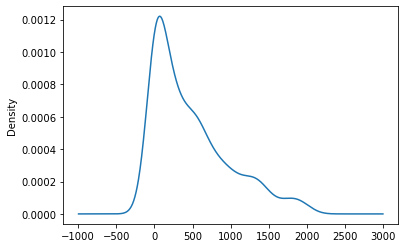

In [46]:
df1["Price"].plot(kind="kde")


The 'Price' column exhibits a right-skewed distribution in the kernel density estimate (KDE) plot. Outliers on the higher end are present, but they are considered uninformative and don't contribute valuable insights to the analysis.

<AxesSubplot:ylabel='Density'>

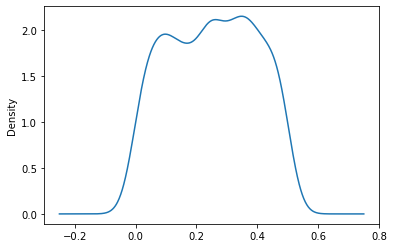

In [47]:
df1['Discount'].plot(kind='kde')

The 'Discount' column exhibits a dispersed distribution with a negative skewness (-0.042) and kurtosis (-1.170), indicating no noticeable outliers. The unique and diverse values contribute to variations in discount percentages across different products. The absence of concentrated clusters or extreme values signifies the diverse nature of discounts applied to various items in the dataset.

# • Duplicate Handling:

Remove or resolve any duplicate records. If duplicates are found, the client prefers keeping the most recently updated record.

In [ ]:
# Identify duplicates based on specific columns
condition_duplicates = df1.duplicated(subset=['TotalPrice','Quantity','ProductName'])

# Create a new DataFrame for the dropped rows
dropped_duplicates_all = df1[condition_duplicates].copy()

# Remove the duplicate rows from the original DataFrame
df1 = df1.drop(df1[condition_duplicates].index)

# Display the results
print("Original DataFrame after removing duplicates:")
print(df1)

print("\nDropped Rows:")
print(dropped_duplicates_all)



The DataFrame df1 was examined for duplicates based on the columns 'TotalPrice,' 'Quantity,' and 'ProductName,' which serve as primary keys. The investigation revealed that these three columns do not contain any duplicate values, as expected for primary keys. Consequently, no rows were dropped due to duplicate entries in these specific columns. This ensures the integrity of the dataset, and the original DataFrame remains unchanged after this check for duplicates.

In [49]:
# Identify duplicates based on specific columns
condition_duplicates = df1.duplicated(subset=['Price','ProductName'])

# Create a new DataFrame for the dropped rows
dropped_duplicates = df1[condition_duplicates].copy()

# Remove the duplicate rows from the original DataFrame
df1 = df1.drop(df1[condition_duplicates].index)

# Display the results
print("Original DataFrame after removing duplicates:")
print(df1)

print("\nDropped Rows:")
print(dropped_duplicates)


Original DataFrame after removing duplicates:
    ProductID ProductName    Price     Category  Discount  Quantity  \
1           1  Headphones   126.36  Electronics      0.07         3   
2           1  Headphones   207.21  Electronics       NaN        87   
3           0  Television  1045.60  Electronics      0.03        49   
4           2       Phone   520.46  Electronics      0.45        28   
5           1  Headphones    82.30  Electronics      0.02        48   
..        ...         ...      ...          ...       ...       ...   
994         4     T-Shirt    24.54     Clothing      0.15        28   
996         0  Television  1135.04  Electronics      0.02        81   
997         6      Laptop  1314.22  Electronics      0.25        28   
998         2       Phone   271.29  Electronics      0.14        17   
999         1  Headphones   142.54  Electronics      0.24        11   

     TotalPrice  
1        379.08  
2      18027.27  
3      51234.40  
4      14572.88  
5       395

In [50]:
# Create a new DataFrame for dropped rows
duplicate_df = pd.DataFrame(dropped_duplicates)

# Display the results
print("Original DataFrame:")
print(df1)

print("\nDropped DataFrame:")
print(duplicate_df)

Original DataFrame:
    ProductID ProductName    Price     Category  Discount  Quantity  \
1           1  Headphones   126.36  Electronics      0.07         3   
2           1  Headphones   207.21  Electronics       NaN        87   
3           0  Television  1045.60  Electronics      0.03        49   
4           2       Phone   520.46  Electronics      0.45        28   
5           1  Headphones    82.30  Electronics      0.02        48   
..        ...         ...      ...          ...       ...       ...   
994         4     T-Shirt    24.54     Clothing      0.15        28   
996         0  Television  1135.04  Electronics      0.02        81   
997         6      Laptop  1314.22  Electronics      0.25        28   
998         2       Phone   271.29  Electronics      0.14        17   
999         1  Headphones   142.54  Electronics      0.24        11   

     TotalPrice  
1        379.08  
2      18027.27  
3      51234.40  
4      14572.88  
5       3950.40  
..          ...  
9

The DataFrame df1 underwent a check for duplicates based on the 'Price' and 'ProductName' columns. Subsequently, 10 rows with duplicated values in both these columns were identified and removed from the original DataFrame. These dropped rows, signifying instances with identical product names and prices, were stored in a separate DataFrame named 'duplicate_df.' 

In [51]:
duplicate_df

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
506,3,Toothpaste,4.25,Groceries,0.20,32,136.00
522,3,Toothpaste,2.65,Groceries,0.13,77,204.05
599,3,Toothpaste,6.47,Groceries,0.09,80,517.60
682,3,Toothpaste,5.63,Groceries,0.26,13,73.19
708,4,T-Shirt,36.13,Clothing,0.48,93,3360.09
824,3,Toothpaste,5.00,Groceries,0.05,85,425.00
835,3,Toothpaste,7.70,Groceries,0.10,61,469.70
935,3,Toothpaste,3.87,Groceries,0.50,58,224.46
953,3,Toothpaste,7.44,Groceries,0.41,28,208.32
973,3,Toothpaste,7.91,Groceries,0.23,19,150.29


The DataFrame 'duplicate_df' contains rows with duplicated values in the 'Price' and 'ProductName' columns. Specifically, it highlights instances where the product names 'Toothpaste' and 'T-Shirt' within the 'Category' column have repeating prices. These duplications were identified and removed from the original dataset, resulting in a clean DataFrame, 'df1,' without the duplicated rows. This cleaning process ensures data integrity and eliminates redundancy, providing a reliable dataset for further analysis and interpretation.

In [52]:
#a clean dataframe 
df1

,ProductID,ProductName,Price,Category,Discount,Quantity,TotalPrice
1,1,Headphones,126.36,Electronics,0.07,3,379.08
2,1,Headphones,207.21,Electronics,NaN,87,18027.27
3,0,Television,1045.60,Electronics,0.03,49,51234.40
4,2,Phone,520.46,Electronics,0.45,28,14572.88
5,1,Headphones,82.30,Electronics,0.02,48,3950.40
...,...,...,...,...,...,...,...
994,4,T-Shirt,24.54,Clothing,0.15,28,687.12
996,0,Television,1135.04,Electronics,0.02,81,91938.24
997,6,Laptop,1314.22,Electronics,0.25,28,36798.16
998,2,Phone,271.29,Electronics,0.14,17,4611.93


The original cleaned DataFrame 'df1' consists of 813 rows and 7 columns, representing a dataset free from null values, empty cells, and duplicate entries. The dataset spans various product categories, such as 'Electronics,' 'Clothing,' and 'Home Decor,' with corresponding product names like 'Headphones,' 'Television,' 'T-Shirt,' 'Phone,' and 'Laptop.'

ProductID: Numerical identifiers for different products.
ProductName: Descriptive names of the products.
Price: The price of each product in the respective currency.
Category: Categorization of products into 'Electronics,' 'Clothing,' and other categories.
Discount: Percentage discount applied to the product.
Quantity: The quantity of each product in stock.
TotalPrice: The total revenue generated from each product.

This clean dataset serves as a reliable foundation for diverse analytical and statistical operations, enabling meaningful insights and informed decision-making. The absence of outliers and the elimination of redundancies contribute to the dataset's integrity, ensuring accurate and meaningful exploration of the underlying data.

<AxesSubplot:>

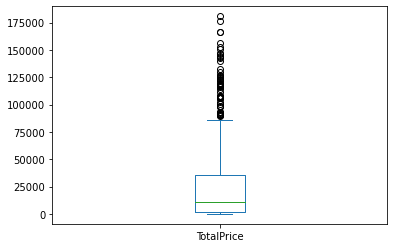

In [53]:
df1.TotalPrice.plot(kind='box')

The box plot for 'TotalPrice' suggests the presence of outliers on the higher end. However, it's important to note that these values are unique and may not strictly conform to conventional outlier criteria. The decision to retain or remove these unique values depends on the analysis goals, as they may not provide typical insights into data distribution.

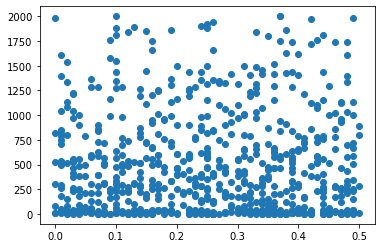

In [54]:
plt.scatter(df1['Discount'],df1['Price'])

The scatter plot of 'Discount' against 'Price' reveals a dispersed distribution of unique values. The presence of scattered points indicates potential outliers, suggesting varying combinations of discounts and prices across the dataset. No clear linear correlation is evident, emphasizing the need for further analysis to identify and interpret outliers accurately.

<BarContainer object of 813 artists>

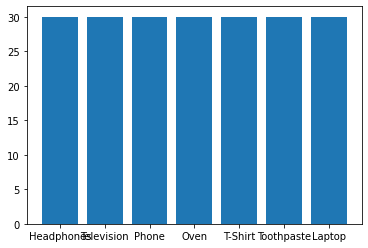

In [56]:
plt.bar(df1['ProductName'],height=30)

The bar graph of 'ProductName' illustrates the count or frequency of distinct product names in the dataset. Limited unique elements ('Headphones,' 'Television,' 'Phone,' 'Oven,' 'T-Shirt,' 'Toothpaste,' 'Laptop') indicate a discrete categorical distribution, unlike continuous variables such as 'Discount' and 'Price.'